# Homework Assignment 2 
## Probability, Naive Bayes and Linear Regression 

### CSCI-P 556: APPLIED MACHINE LEARNING Spring 2021

### 2Q) A hospital staff member wants to determine if a patient’s satisfaction with the hospital (y) can be predicted from the patient’s age (x1, in years), severity of illness (x2), and anxiety level (x3).

### Forty-six patients were randomly selected, where the data is in the file patient satisfaction.txt with column 1 containing y-values, and columns 2-4 containing values for x1, x2 and x3, respectively. Large values indicate more satisfaction, illness severity, and anxiety.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
from sklearn import preprocessing
import random
import os
from sklearn.model_selection import KFold 

In [3]:
header_list = ['hospital', 'age', 'illness severity', 'anxiety level']
satisfaction = pd.read_csv('/Users/prateesh/Desktop/Applied ML/P556-prpatlol/hw2/patient_satisfaction.txt', sep='   ',names=header_list)

<ipython-input-3-872dca7d2d3c>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  satisfaction = pd.read_csv('/Users/prateesh/Desktop/Applied ML/P556-prpatlol/hw2/patient_satisfaction.txt', sep='   ',names=header_list)


In [4]:
satisfaction.head()

,hospital,age,illness severity,anxiety level
0,48,50,51,2.3
1,57,36,46,2.3
2,66,40,48,2.2
3,70,41,44,1.8
4,89,28,43,1.8


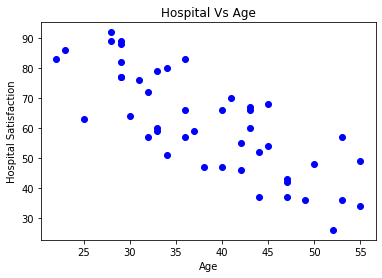

In [5]:
# Scatter Plot between hospital and age
plt.scatter(satisfaction['age'],satisfaction['hospital'], c ='Blue')
plt.title('Hospital Vs Age')
plt.xlabel('Age')
plt.ylabel('Hospital Satisfaction')
plt.show()

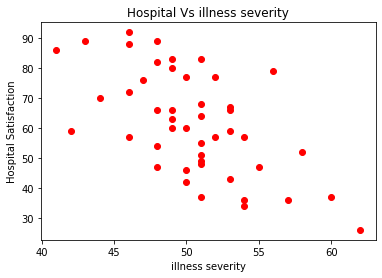

In [6]:
# Scatter Plot between hospital and age
plt.scatter(satisfaction['illness severity'],satisfaction['hospital'], c = 'Red' )
plt.title('Hospital Vs illness severity')
plt.xlabel('illness severity')
plt.ylabel('Hospital Satisfaction')
plt.show()

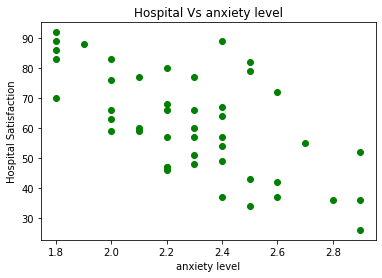

In [7]:
# Scatter Plot between hospital and age
plt.scatter(satisfaction['anxiety level'],satisfaction['hospital'], c='Green')
plt.title('Hospital Vs anxiety level')
plt.xlabel('anxiety level')
plt.ylabel('Hospital Satisfaction')
plt.show()

- ### All 3 features age, illness severity, anxiety level are negitively co-related to the target label Hospital Satisfaction i.e.. if these are higher the target seems to be lower 
- ### compared to other features Age seems to be more dense whereas the other two are scattered

In [8]:
satisfaction.describe()

,hospital,age,illness severity,anxiety level
count,46.000000,46.000000,46.000000,46.000000
mean,61.565217,38.391304,50.434783,2.286957
std,17.236463,8.918092,4.313556,0.299339
min,26.000000,22.000000,41.000000,1.800000
25%,48.250000,31.250000,48.000000,2.100000
50%,60.000000,37.500000,50.500000,2.300000
75%,76.750000,44.750000,53.000000,2.475000
max,92.000000,55.000000,62.000000,2.900000


In [9]:
# Scaling the data to better fit the model.
from sklearn import preprocessing
mmx = preprocessing.MinMaxScaler()
mmy = preprocessing.MinMaxScaler()
scaled_X = mmx.fit_transform(satisfaction.drop(['hospital'], axis = 1))
scaled_y = mmy.fit_transform(satisfaction['hospital'].values.reshape(satisfaction.shape[0],1))
scaled_y = scaled_y.reshape(satisfaction['hospital'].shape[0],)

In [10]:
# Dividing into Features and Target
X = satisfaction.drop(['hospital'], axis = 1)
y = satisfaction['hospital']

In [11]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [18]:
def batch_gd(X, y, epochs, lr):
# We have 3 Features for W
    W = np.ones(3) 
    b = 0
    n_rows = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):        
        y_pred = np.dot(W, X.T) + b        
        d_W = -(2/n_rows)*(X.T.dot(y-y_pred))
        d_b = -(2/n_rows)*np.sum(y-y_pred)        
        W = W - lr * d_W
        b = b - lr * d_b
        # Mean Square Error
        cost = np.mean(np.square(y-y_pred))
        cost_list.append(cost)
        epoch_list.append(i)
    return W,b,cost,cost_list,epoch_list

W_batch, b_batch, cost_batch,cost_list,epoch_list = batch_gd(scaled_X,scaled_y,2000, 0.01)

In [17]:
W_batch, b_batch, cost_batch

(array([-0.48612975,  0.02592901, -0.3116656 ]),
 0.9015179972138813,
 0.022641620198518564)

In [28]:
def stochastic_gd(X, y, epochs, lr ):
# We have 3 Features for W   
    W = np.ones(3) 
    b = 0
    n_rows = X.shape[0]
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        # random index
        rand_i = random.randint(0, n_rows-1) 
        x_sgd = X[rand_i]
        y_sgd = y[rand_i]
        y_pred = np.dot(W, x_sgd.T) + b
        d_W = -(2/n_rows)*(x_sgd.T.dot(y_sgd-y_pred))
        d_b = -(2/n_rows)*(y_sgd-y_pred)
        W = W - lr * d_W
        b = b - lr * d_b
        cost = np.square(y_sgd-y_pred)
        cost_list.append(cost)
        epoch_list.append(i)  
            
    return W, b, cost, cost_list, epoch_list


W_stoch, b_stoch, cost_stoch, cost_list_s, epoch_list_s = stochastic_gd(scaled_X, scaled_y, 10000 ,0.01)

In [29]:
W_stoch, b_stoch, cost_stoch

(array([0.3385223 , 0.52417586, 0.35988574]),
 -0.09837131998768722,
 0.02139043117232712)

In [30]:
def mini_batch_gd(X, y, epochs, batch_size , lr):    
    W = np.ones(3) 
    b = 0
    n_rows = X.shape[0]
    if batch_size > n_rows: 
        batch_size = n_rows
        
    cost_list = []
    epoch_list = []
    n_batches = int(n_rows/batch_size)
    for i in range(epochs):    
        rand_i = np.random.permutation(n_rows)
        t_x, t_y = X[rand_i], y[rand_i]
        for j in range(0,n_rows,batch_size):
            n_x = t_x[j:j+batch_size]
            n_y = t_y[j:j+batch_size]
            y_pred = np.dot(W, n_x.T) + b
            d_W = -(2/len(n_x))*(n_x.T.dot(n_y-y_pred))
            d_b = -(2/len(n_x))*np.sum(n_y-y_pred)
            W = W - lr * d_W
            b = b - lr * d_b
            c = np.mean(np.square(n_y-y_pred)) # Mean Squared Error
            cost_list.append(c)
            epoch_list.append(i)
    return W, b, c, cost_list, epoch_list

W_minibatch, b_minibatch, cost_minibatch, cost_list_mb, epoch_list_mb = mini_batch_gd(scaled_X, scaled_y, 100, 5 ,0.01)

In [31]:
W_minibatch, b_minibatch, cost_minibatch

(array([-0.27311158,  0.14907039, -0.20272122]),
 0.661885088196479,
 0.15192882860954532)

In [32]:
def MSqrError(actual, pred):
    error_sum = 0.0
    for j in range(len(actual)):
        error_pred = pred[j] - actual[j]
        error_sum += (error_pred ** 2)
        mean_square_error = error_sum / float(len(actual))
    return mean_square_error

def predict_function(Age,Severity_of_illness,Anxiety_level,w,b):
    scaled_X = mmx.transform([[Age, Severity_of_illness,Anxiety_level]])[0]
    scaled_prediction = w[0] * scaled_X[0] + w[1] * scaled_X[1] + w[2] * scaled_X[2] + b
    # Inverse transform of scaled value to get original value
    return mmy.inverse_transform([[scaled_prediction]])[0][0]

In [33]:
predict_function(50,51,2.3,W_batch, b_batch)

49.74186539112323

In [34]:
predict_function(45,51,2.2,W_stoch, b_stoch)

60.1908751740198

In [35]:
predict_function(28,43, 1.8, W_minibatch, b_minibatch)

67.34409078326749

## For Learning rate 0.001

In [48]:
list_cost_f,list_epoch_f = [[],[],[]],[[],[],[]]
import seaborn as sns
Fold = 1

for train_index, test_index in kf.split(X, y):
    pred_y1 = [[],[],[]]
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train = y_train.values.reshape(y_train.count(),1)
    scaled_X = mmx.fit_transform(X_train)
    scaled_y = mmy.fit_transform(y_train)
    scaled_y = scaled_y.reshape(y_train.shape[0],)


    print('Fold',Fold)
    Fold = Fold + 1
    
    # Batch Gradient Descent
    w_b, b_b, cost_b, cost_list_b, epoch_list_b = batch_gd(scaled_X, scaled_y, 2000 ,0.001)
    list_cost_f[0].append(cost_list_b)
    list_epoch_f[0].append(epoch_list_b)
    for i in X_test.T:
        y_hat_b = predict_function(X_test.T[i][0],X_test.T[i][1],X_test.T[i][2],w_b,b_b)
        pred_y1[0].append(y_hat_b)
    print("E_batch:", MSqrError(y_test.values, pred_y1[0]))
    


    # Stochastic Gradient Descent      
    w_s, b_s, cost_s, cost_list_s, epoch_list_s = stochastic_gd(scaled_X,scaled_y,3000 ,0.001)
    list_cost_f[1].append(cost_list_s)
    list_epoch_f[1].append(epoch_list_s)
    for i in X_test.T:
        y_hat_sgd = predict_function(X_test.T[i][0],X_test.T[i][1],X_test.T[i][2],w_s,b_s)
        pred_y1[1].append(y_hat_sgd)
    print("E_stochastic:", MSqrError(y_test.values, pred_y1[1]))
    
    

    # Mini Batch Gradient Descent
    w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = mini_batch_gd(scaled_X,scaled_y,100, 5 ,0.001)
    list_cost_f[2].append(cost_list_mb)
    list_epoch_f[2].append(epoch_list_mb)

    for i in X_test.T:
        y_hat_mini_batch = predict_function(X_test.T[i][0],X_test.T[i][1],X_test.T[i][2],w_mb,b_mb)
        pred_y1[2].append(y_hat_mini_batch)
    print("E_mini:", MSqrError(y_test.values, pred_y1[2]))
    
    
    
    print("Cost_batch:", cost_b)
    print("Cost_mini:", cost_mb)
    print("Cost_stochastic:", cost_s)
    print( '-' * 30)

Fold 1
E_batch: 30.045582488058976
E_stochastic: 328.20442574250353
E_mini: 30.30577760633026
Cost_batch: 0.022996802958259194
Cost_mini: 0.00025984506786034834
Cost_stochastic: 0.002216107292178568
------------------------------
Fold 2
E_batch: 58.1350683985728
E_stochastic: 493.8063685046521
E_mini: 73.25460500075198
Cost_batch: 0.028965620927295013
Cost_mini: 0.04145331165888704
Cost_stochastic: 0.13135588345405216
------------------------------
Fold 3
E_batch: 224.5080086082663
E_stochastic: 275.3768377181667
E_mini: 227.19591902228854
Cost_batch: 0.01770346665873026
Cost_mini: 0.001779861126207674
Cost_stochastic: 0.2362755058947364
------------------------------
Fold 4
E_batch: 116.23918655800314
E_stochastic: 239.8415242384428
E_mini: 93.35242977245196
Cost_batch: 0.0206484825322321
Cost_mini: 0.03443398027720185
Cost_stochastic: 0.019426269694336876
------------------------------
Fold 5
E_batch: 40.753733128381825
E_stochastic: 269.2526291801054
E_mini: 32.81089094807335
Cost_b

## For learning rate 0.01

In [54]:
list_cost_f,list_epoch_f = [[],[],[]],[[],[],[]]
import seaborn as sns
Fold = 1

for train_index, test_index in kf.split(X, y):
    pred_y1 = [[],[],[]]
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train = y_train.values.reshape(y_train.count(),1)
    scaled_X = mmx.fit_transform(X_train)
    scaled_y = mmy.fit_transform(y_train)
    scaled_y = scaled_y.reshape(y_train.shape[0],)


    print('Fold',Fold)
    Fold = Fold + 1
    
    # Batch Gradient Descent
    w_b, b_b, cost_b, cost_list_b, epoch_list_b = batch_gd(scaled_X, scaled_y, 2000 ,0.01)
    list_cost_f[0].append(cost_list_b)
    list_epoch_f[0].append(epoch_list_b)
    for i in X_test.T:
        y_hat_b = predict_function(X_test.T[i][0],X_test.T[i][1],X_test.T[i][2],w_b,b_b)
        pred_y1[0].append(y_hat_b)
    print("E_batch:", MSqrError(y_test.values, pred_y1[0]))
    


    # Stochastic Gradient Descent      
    w_s, b_s, cost_s, cost_list_s, epoch_list_s = stochastic_gd(scaled_X,scaled_y,3000 ,0.01)
    list_cost_f[1].append(cost_list_s)
    list_epoch_f[1].append(epoch_list_s)
    for i in X_test.T:
        y_hat_sgd = predict_function(X_test.T[i][0],X_test.T[i][1],X_test.T[i][2],w_s,b_s)
        pred_y1[1].append(y_hat_sgd)
    print("E_stochastic:", MSqrError(y_test.values, pred_y1[1]))
    
    

    # Mini Batch Gradient Descent
    w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = mini_batch_gd(scaled_X,scaled_y,100, 5 ,0.01)
    list_cost_f[2].append(cost_list_mb)
    list_epoch_f[2].append(epoch_list_mb)

    for i in X_test.T:
        y_hat_mini_batch = predict_function(X_test.T[i][0],X_test.T[i][1],X_test.T[i][2],w_mb,b_mb)
        pred_y1[2].append(y_hat_mini_batch)
    print("E_mini:", MSqrError(y_test.values, pred_y1[2]))
    
    
    
    print("Cost_batch:", cost_b)
    print("Cost_mini:", cost_mb)
    print("Cost_stochastic:", cost_s)
    print( '-' * 30)

Fold 1
E_batch: 160.70490313202973
E_stochastic: 1689.5726178149143
E_mini: 633.5583532182195
Cost_batch: 0.04197910523432748
Cost_mini: 0.025721511044986822
Cost_stochastic: 0.16566954949842191
------------------------------
Fold 2
E_batch: 275.83383649805427
E_stochastic: 3183.7681045939444
E_mini: 888.510199791328
Cost_batch: 0.05021243786350264
Cost_mini: 0.3632307746726098
Cost_stochastic: 0.05062672662770742
------------------------------
Fold 3
E_batch: 252.51788497683486
E_stochastic: 552.3092731686213
E_mini: 321.2130971945259
Cost_batch: 0.0334038436477082
Cost_mini: 0.3371322855631748
Cost_stochastic: 0.4073337655987771
------------------------------
Fold 4
E_batch: 152.01894718482657
E_stochastic: 1244.2611059225178
E_mini: 440.50013376364376
Cost_batch: 0.039156417459038514
Cost_mini: 0.002063395000156259
Cost_stochastic: 0.25018974337116107
------------------------------
Fold 5
E_batch: 126.7274236550937
E_stochastic: 2475.1685048548393
E_mini: 700.0804948878679
Cost_batc

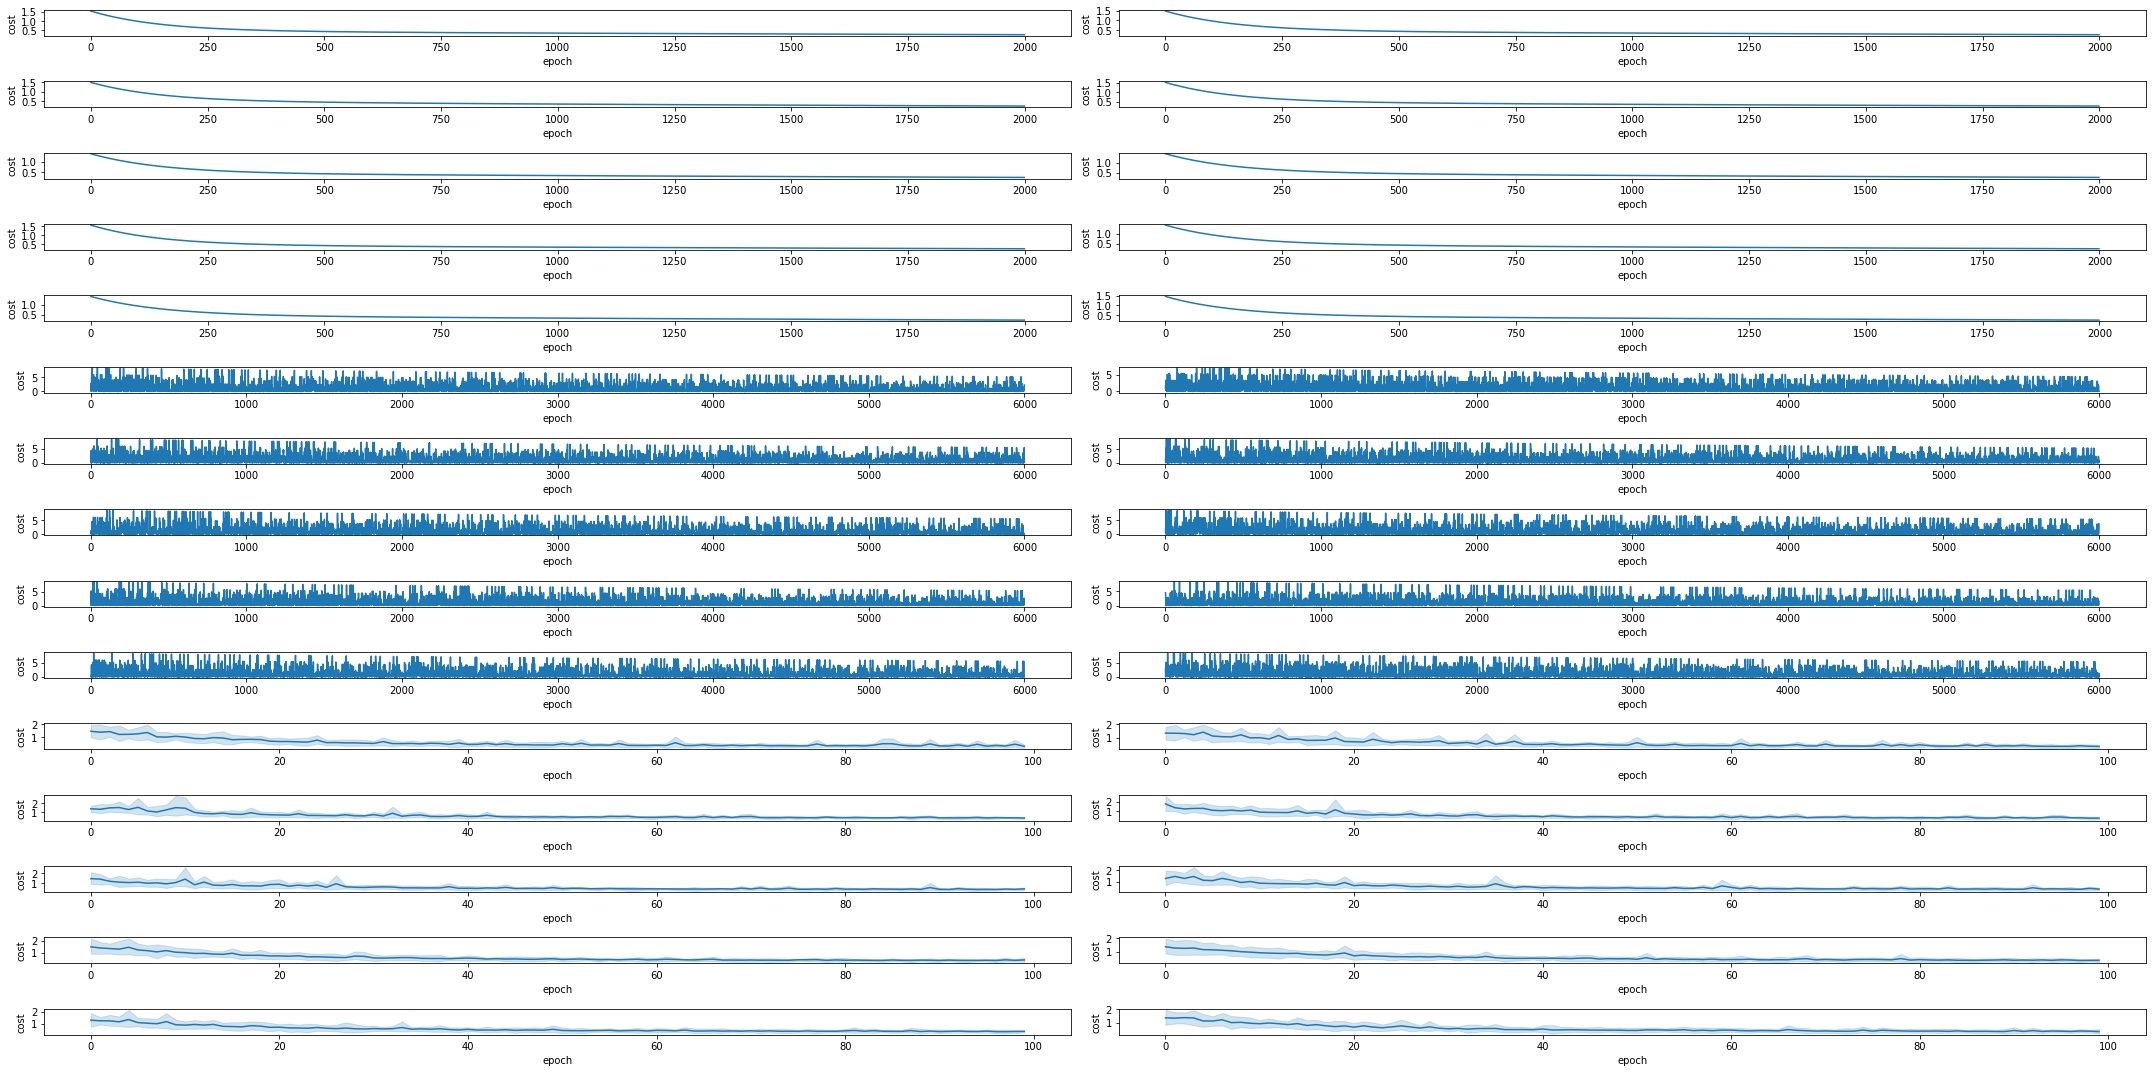

In [45]:
# Plotting the loss with different Gradient descents for 10 folds
i = 1
fig = plt.figure(figsize=(30,15))
for cost_of_descent,epoch_of_descent in zip(list_cost_f,list_epoch_f):           
    for cost,epoch in zip(cost_of_descent,epoch_of_descent):
        fig.add_subplot(15,2,i)
        sns.lineplot(x= epoch, y=cost)
        plt.xlabel("epoch")
        plt.ylabel("cost")
        i+=1
plt.tight_layout()

## Description

- Implementation of Mini-Batch Gradient Descent and plotting cost over iterations for visualization
Many combinations of learning rate and iterations were tried and it is observed that the cost function reaches its minima for all folds with value of learning rate as 0.001, number of iterations as 100 and batch size as 10.


- Implementation of Batch Gradient Descent and plotting cost over iterations for visualization
Many combinations of learning rate and iterations were tried and it is observed that the cost function reaches its minima for all folds with value of learning rate as 0.001 and number of iterations as 2000.


- Implementation of Stochastic Gradient Descent and plotting cost over iterations for visualization
Many combinations of learning rate and iterations were tried and it is observed that the cost function reaches its minima for all folds with value of learning rate as 0.001 and number of iterations as 3000.


### Answer for Q3

- We have displayed the mean-square value for every fold using each technique in the snippet above.It can be observed that we get the least value of mean-square error in the implementation of batch gradient descent. 


- This is because the global minima and local minima are the same, so batch gradient descent performs the best with respect to stochastic and mini-batch gradient descent.